In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.17.0'

In [ ]:
!pip install tensorflow-gpu==2.0.rc

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0.rc (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0.rc


In [ ]:
tf.__version__


'2.17.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
pwd

'/content/drive/MyDrive/ML'

In [ ]:
ls

test.p  TrafficNet.ipynb  traffic-signs-data.zip  train.p  valid.p


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=6148cc76a99bea5a67b7d938927ad3eced6706f0c0f40b739208586f7deb6f3a
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [ ]:
data ="./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [ ]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [ ]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode="rb") as f:
  test = pickle.load(f)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [ ]:
trainX = train["features"]
trainY = train["labels"]

In [ ]:
trainX.shape

(34799, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt

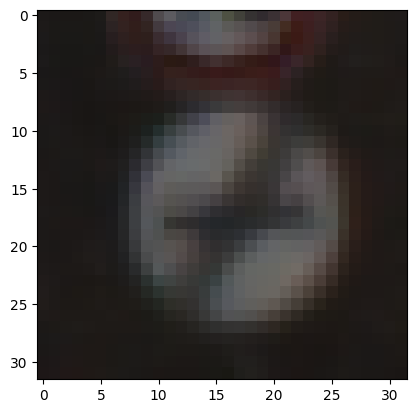

In [ ]:
plt.imshow(trainX[0])

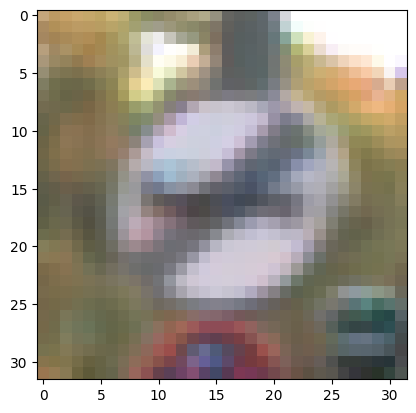

In [ ]:
plt.imshow(trainX[100])

In [ ]:
trainY[100]

41

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [ ]:
classNames[trainY[100]]

'End of no passing'

In [ ]:
from sklearn.utils import shuffle

In [ ]:
trainX, trainY = shuffle(trainX, trainY)

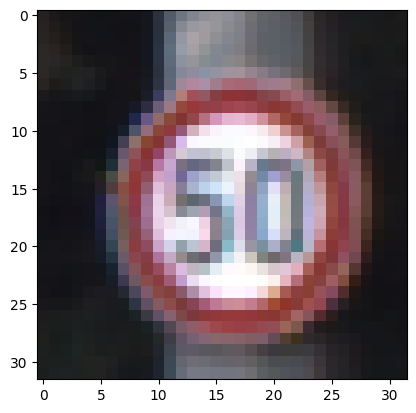

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames[trainY[0]]

'Speed limit (50km/h)'

In [ ]:
validX = valid["features"]
validY = valid["labels"]

In [ ]:
testX = test["features"]
testY = test["labels"]

In [ ]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [ ]:
trainX

array([[[[0.15294118, 0.1254902 , 0.12941176],
         [0.11372549, 0.09803922, 0.10588235],
         [0.08627451, 0.08627451, 0.09411765],
         ...,
         [0.09411765, 0.10196078, 0.10588235],
         [0.09803922, 0.09803922, 0.10196078],
         [0.10196078, 0.10588235, 0.10588235]],

        [[0.15686275, 0.1372549 , 0.1372549 ],
         [0.1254902 , 0.10980392, 0.10980392],
         [0.09803922, 0.09019608, 0.09411765],
         ...,
         [0.09803922, 0.10196078, 0.10588235],
         [0.10196078, 0.10196078, 0.10196078],
         [0.10196078, 0.10196078, 0.10196078]],

        [[0.15294118, 0.14509804, 0.13333333],
         [0.14117647, 0.12156863, 0.11372549],
         [0.11372549, 0.09803922, 0.09411765],
         ...,
         [0.10588235, 0.10588235, 0.10980392],
         [0.10196078, 0.10196078, 0.10588235],
         [0.10196078, 0.10588235, 0.10588235]],

        ...,

        [[0.11764706, 0.1254902 , 0.12156863],
         [0.10588235, 0.11764706, 0.11372549]

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainY = lb.fit_transform(trainY)

In [ ]:
validY = lb.fit_transform(validY)

In [ ]:
testY = lb.fit_transform(testY)

In [ ]:
valid["labels"][0]

41

In [ ]:
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential()

In [ ]:
width = 32
height = 32
classes = 43

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(43))
#model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │          22,0

 Total params: 2,188,107 (8.35 MB)

 Trainable params: 2,186,699 (8.34 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01

In [ ]:
epochs = 10
batch_size = 64


In [ ]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [ ]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
print("Start training")
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

Start training
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


543/543 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.2972 - loss: 2.6523 - val_accuracy: 0.5166 - val_loss: 1.6777
Epoch 2/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7188 - loss: 0.9541

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7188 - loss: 0.9541 - val_accuracy: 0.5066 - val_loss: 1.7135
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.6887 - loss: 0.9357 - val_accuracy: 0.6195 - val_loss: 1.3432
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 606us/step - accuracy: 0.8281 - loss: 0.6031 - val_accuracy: 0.6304 - val_loss: 1.3015
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8468 - loss: 0.4640 - val_accuracy: 0.7510 - val_loss: 0.8389
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.9219 - loss: 0.2340 - val_accuracy: 0.7569 - val_loss: 0.8458
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.9164 - loss: 0.2607 - val_accuracy: 0.7880 - val_loss: 0.7609
Epoch 8/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9844 - loss: 0.1330 - val_accuracy: 0.7907 - val_loss: 0.7667
Epoch 9/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 26s 47ms/step - accuracy: 0.9500 - loss: 0.1532 - val_accurac

In [ ]:
model.save("TraficNet.h5")

In [ ]:
saved_model = tf.keras.models.load_model("TraficNet.h5")

In [ ]:
result = saved_model.predict(testX[500:501])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
result

array([[4.7886171e-09, 1.1012500e-14, 5.9149883e-14, 8.3378264e-14,
        6.3093866e-13, 1.7780570e-16, 4.7563432e-11, 6.9367350e-14,
        5.1669415e-11, 4.9232008e-06, 2.8735170e-07, 1.5019257e-11,
        1.1273569e-10, 1.5105286e-13, 4.2332422e-12, 3.2478997e-09,
        4.7709037e-09, 4.1547032e-10, 1.8279011e-12, 2.4992425e-03,
        1.8869470e-08, 6.7519510e-09, 9.6680552e-01, 3.0585827e-02,
        7.1494625e-08, 9.8607416e-05, 1.2319256e-07, 7.0964874e-09,
        1.1026084e-09, 5.3987486e-07, 9.0000389e-09, 4.6435653e-06,
        2.3869512e-10, 4.9763427e-10, 1.9448826e-11, 9.0912016e-13,
        1.7826210e-12, 7.7491674e-10, 8.4953705e-14, 8.9680419e-10,
        1.7249892e-09, 1.1930354e-07, 2.2773450e-10]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
final = np.argmax(result)

In [ ]:
final = classNames[final]

In [ ]:
final

'Bumpy road'

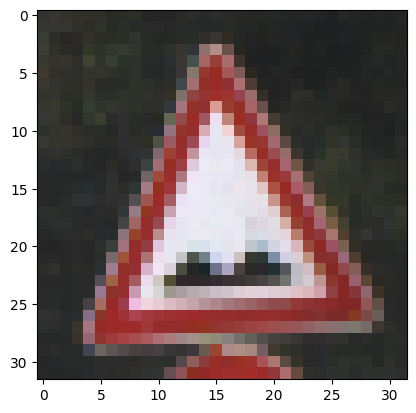

In [ ]:
plt.imshow(test["features"][500])